<a href="https://colab.research.google.com/github/NomaguguTNdlovu/repo-2025_ia651_ndlovu/blob/main/Machine%20Learning%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Data Collection and Preprocessing


In [ ]:
# Mount Google Drive to access files within it.
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

#  reading the CSV file.
df = pd.read_csv('/content/drive/My Drive/FIFA22.csv')
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Name,Age,Nationality,Overall,Potential,Values,Wage,Special,Preferred Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198.0,Bruno Fernandes,26.0,Portugal,88.0,89.0,107500000.0,250000.0,2341.0,Right,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,206900000.0,72.0
1,209658.0,L. Goretzka,26.0,Germany,87.0,88.0,93000000.0,140000.0,2314.0,Right,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,160400000.0,74.0
2,176580.0,L. Suárez,34.0,Uruguay,88.0,88.0,44500000.0,135000.0,2307.0,Right,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,91200000.0,42.0
3,192985.0,K. De Bruyne,30.0,Belgium,91.0,91.0,125500000.0,350000.0,2304.0,Right,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,232200000.0,68.0
4,224334.0,M. Acuña,29.0,Argentina,84.0,84.0,37000000.0,45000.0,2292.0,Left,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,77700000.0,80.0


In [ ]:
df.shape

(16801, 54)

In [ ]:
df = df.dropna(subset=['ID'])
df = df.dropna(axis=1, how='all')  # Drop columns where all values are null

# 3. Save the cleaned DataFrame to a new CSV (optional)
df.to_csv('FIFA.csv', index=False)

In [ ]:
df.shape

(16710, 54)

Does Overall rating vary by Preferred Foot?

print(df.columns)

In [ ]:
print(df.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Values',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')


In [ ]:
# Replace missing values in 'DefensiveAwareness' with its mean
def_awareness_mean = df['DefensiveAwareness'].mean()
df['DefensiveAwareness'] = df['DefensiveAwareness'].fillna(def_awareness_mean)


In [ ]:
missing_values = df.isnull().sum()

print(missing_values)

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Values                        0
Wage                          0
Special                       0
Preferred Foot                0
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Work Rate                     0
Position                     26
Height                        0
Weight                        0
Crossing                      0
Finishing                     0
HeadingAccuracy               0
ShortPassing                  0
Volleys                      37
Dribbling                     0
Curve                        37
FKAccuracy                    0
LongPassing                   0
BallControl                   0
Acceleration                  0
SprintSpeed                   0
Agility                      37
Reactions                     0
Balance 

Explaratory Data Analysis


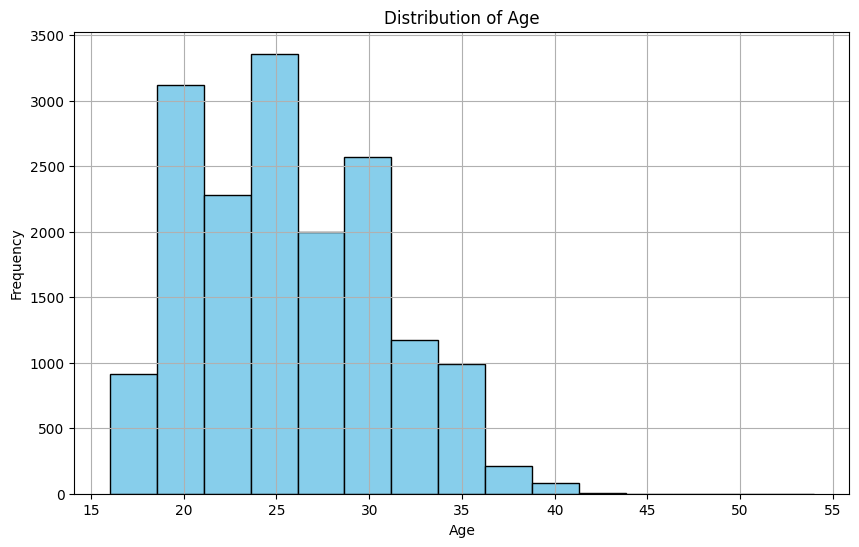

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
df.Age.mean()

np.float64(25.727408737283064)

In [ ]:
foot = df['Preferred Foot'].value_counts()
foot

,count
Preferred Foot,
Right,12613
Left,4097


TOP 5 PLAYERS WITH HIGHEST OVERALL


In [ ]:
fifa_overall = df.sort_values(['Overall'],ascending=False)[:5]
fifa_overall[['Name','Overall','Potential','Preferred Foot','Position']].style.background_gradient(cmap='Reds')

,Name,Overall,Potential,Preferred Foot,Position
29,L. Messi,93.000000,93.000000,Left,RW
33,R. Lewandowski,92.000000,92.000000,Right,ST
14244,J. Oblak,91.000000,93.000000,Right,GK
3,K. De Bruyne,91.000000,91.000000,Right,RCM
82,K. Mbappé,91.000000,95.000000,Right,ST


TOP 5 PLAYERS WITH HIGHEST POTENTIAL

In [ ]:
fifa_potential = df.sort_values(['Potential'],ascending=False)[:5]
fifa_potential[['Name','Overall','Potential','Preferred Foot','Position']].style.background_gradient(cmap='Greens')

,Name,Overall,Potential,Preferred Foot,Position
82,K. Mbappé,91.000000,95.000000,Right,ST
14244,J. Oblak,91.000000,93.000000,Right,GK
14608,G. Donnarumma,89.000000,93.000000,Right,GK
29,L. Messi,93.000000,93.000000,Left,RW
251,E. Haaland,88.000000,93.000000,Left,RS


top 5 highest valued players

In [ ]:
df.sort_values(['Wage'],ascending=False)[:5]

,ID,Name,Age,Nationality,Overall,Potential,Values,Wage,Special,Preferred Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
2094,174379.0,21 G. Castro,35.0,Uruguay,75.0,75.0,2300000.0,950000.0,1919.0,Left,...,37.0,9.0,16.0,15.0,10.0,14.0,LM,75.0,5100000.0,35.0
10067,211227.0,M. Kopczyński,29.0,Poland,63.0,63.0,400000.0,950000.0,1627.0,Right,...,63.0,15.0,8.0,11.0,13.0,7.0,CDM,63.0,540000.0,62.0
15976,213678.0,K. O'Hara,24.0,Republic of Ireland,62.0,67.0,475000.0,950000.0,1093.0,Right,...,19.0,63.0,59.0,57.0,60.0,64.0,GK,62.0,867000.0,15.0
3991,229128.0,T. Lorch,27.0,South Africa,73.0,73.0,3200000.0,950000.0,1833.0,Right,...,30.0,14.0,8.0,6.0,6.0,9.0,RW,73.0,7000000.0,51.0
13934,252435.0,J. Austerfield,19.0,England,55.0,75.0,350000.0,950000.0,1441.0,Right,...,45.0,14.0,8.0,5.0,14.0,11.0,CAM,57.0,998000.0,40.0


Player Position

<ipython-input-29-24b526c54b88>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=playerposition.index, y=playerposition.values, palette='viridis')


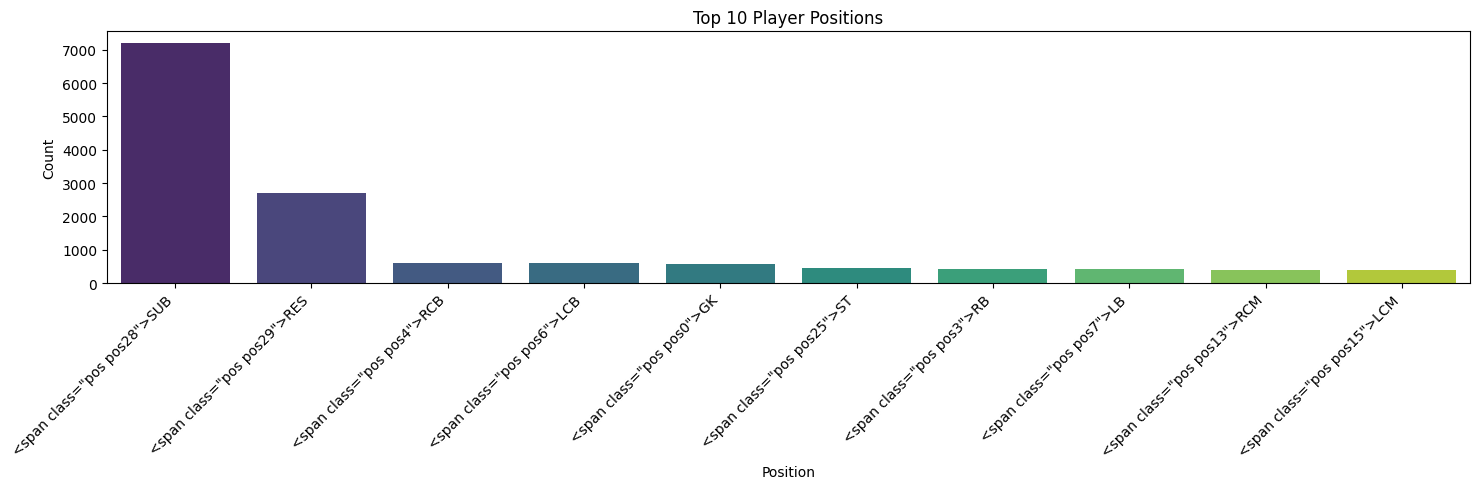

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

playerposition = df['Position'].value_counts().head(10)

# Plotting the bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x=playerposition.index, y=playerposition.values, palette='viridis')


plt.title('Top 10 Player Positions')
plt.xlabel('Position')
plt.ylabel('Count')


plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

value vs position

<ipython-input-30-2e00fde9dd9e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=fifa_top10['Values'], x=fifa_top10['Position'], palette='Set2')


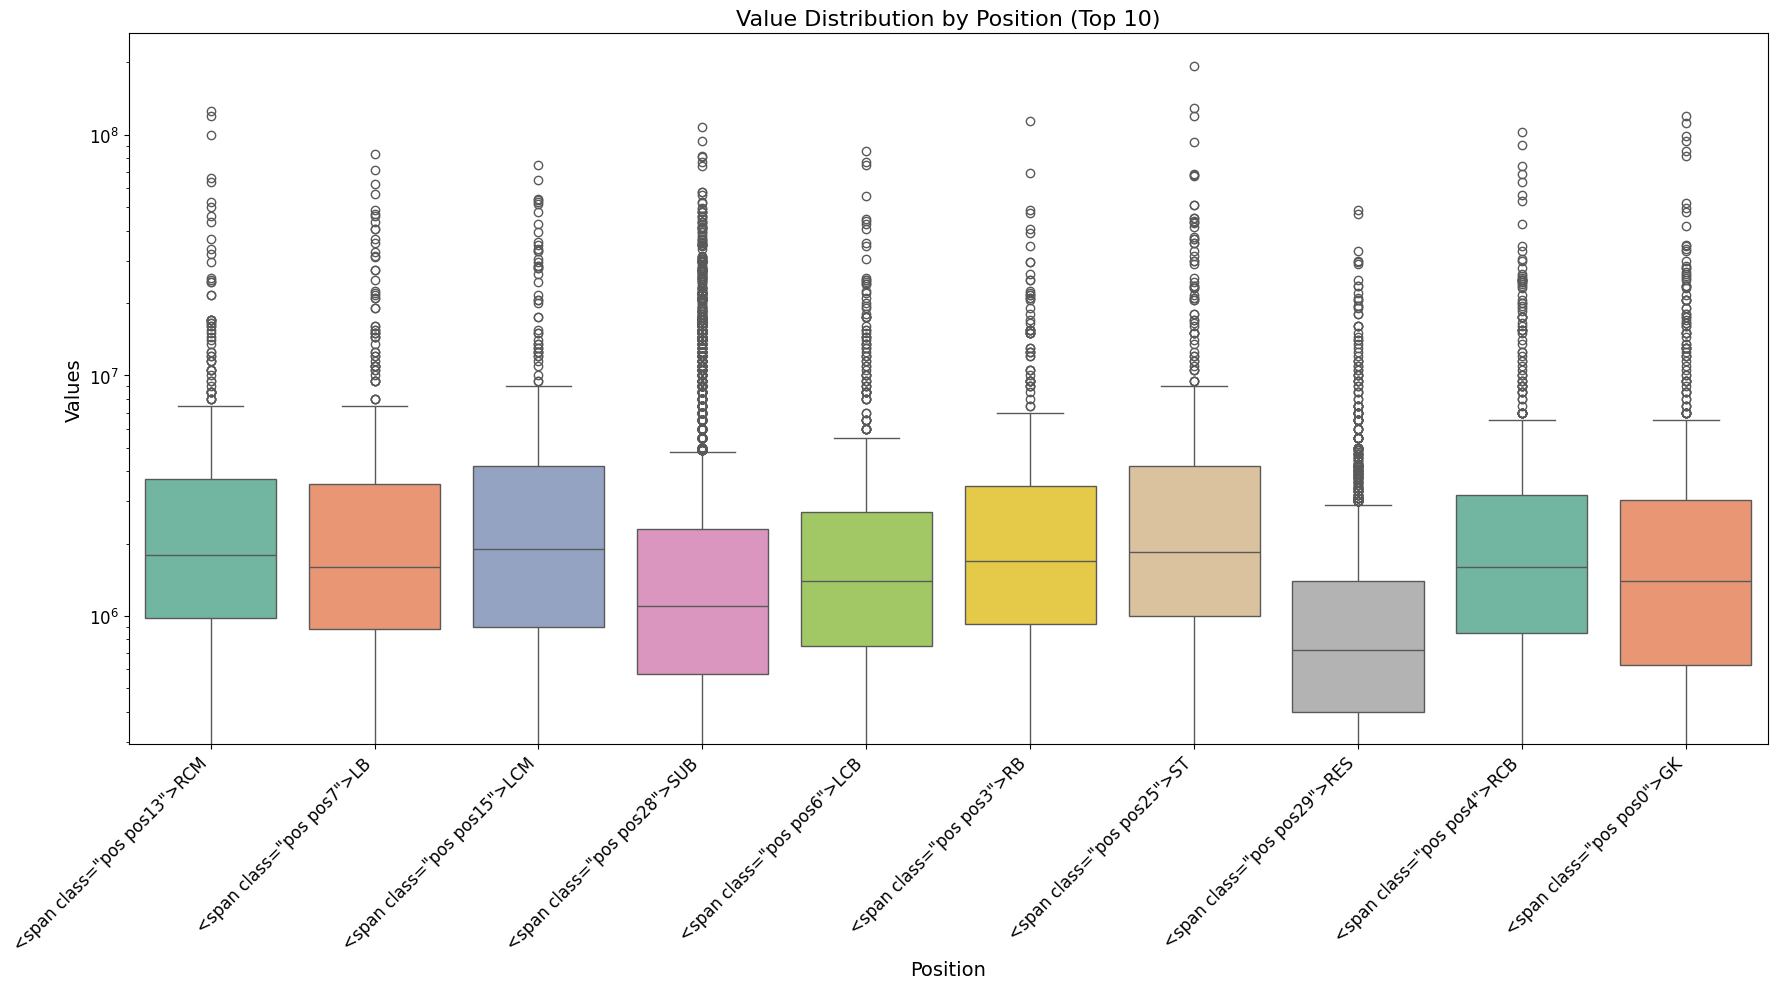

In [ ]:
# Get the top 10 positions by counting occurrences
top_10_positions = df['Position'].value_counts().head(10).index

fifa_top10 = df[df['Position'].isin(top_10_positions)]


plt.figure(figsize=(18, 10))


sns.boxplot(y=fifa_top10['Values'], x=fifa_top10['Position'], palette='Set2')


plt.xticks(rotation=45, ha='right', fontsize=12)

plt.xlabel('Position', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Value Distribution by Position (Top 10)', fontsize=16)


plt.yscale('log')
plt.yticks(fontsize=12)

#used log scales for the values for the graph to be clear
plt.tight_layout()

# Show the plot
plt.show()

correlation

<ipython-input-31-5c30eefe318d>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["0", "0.2", "0.4", "0.6", "0.8", "1.0"], fontsize=10)


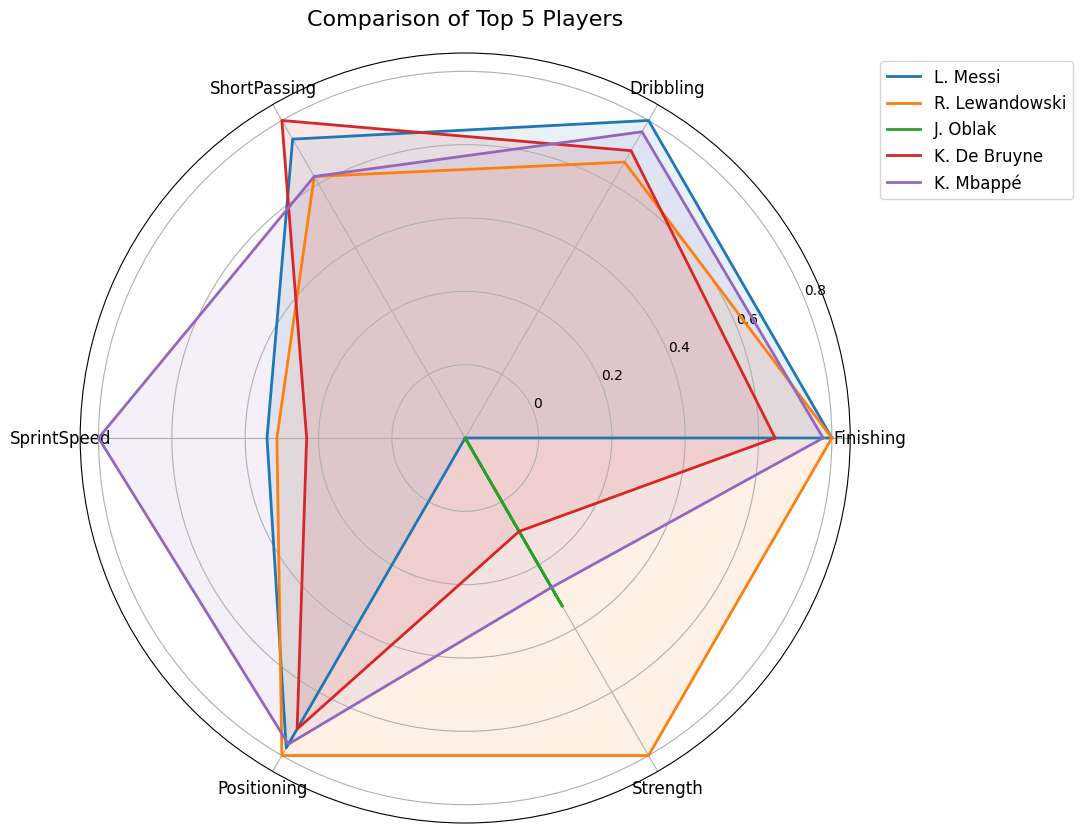

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi


top_5_players = df.sort_values(by='Overall', ascending=False).head(5)


attributes = ['Finishing', 'Dribbling', 'ShortPassing', 'SprintSpeed','Positioning', 'Strength']
num_vars = len(attributes)


top_5_players_normalized = top_5_players[['Name'] + attributes].set_index('Name')
top_5_players_normalized = top_5_players_normalized.apply(lambda x: (x - x.min()) / (x.max() - x.min()))


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)


for i, player in enumerate(top_5_players_normalized.index):
    values = top_5_players_normalized.loc[player].tolist()
    values += values[:1]
    ax.plot(angles, values, label=player, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes, fontsize=12)
ax.set_yticklabels(["0", "0.2", "0.4", "0.6", "0.8", "1.0"], fontsize=10)
plt.title("Comparison of Top 5 Players", fontsize=16, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize=12)

plt.show()


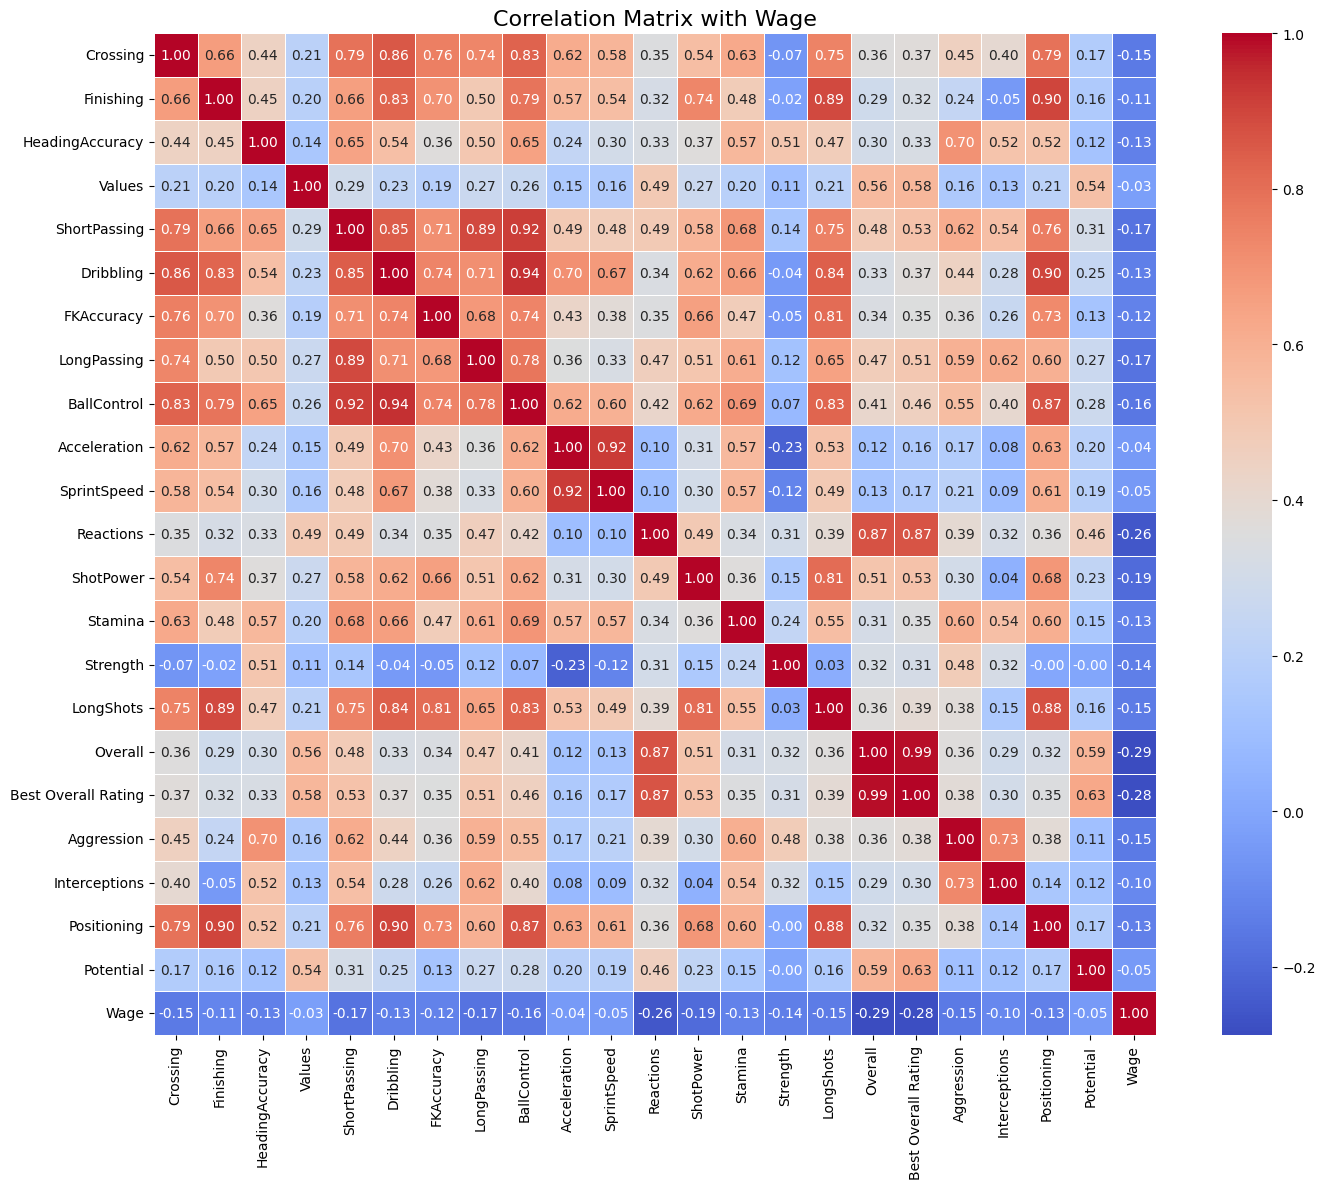

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = [
    'Crossing', 'Finishing', 'HeadingAccuracy', 'Values',
    'ShortPassing', 'Dribbling', 'FKAccuracy', 'LongPassing',
    'BallControl', 'Acceleration', 'SprintSpeed', 'Reactions',
    'ShotPower', 'Stamina', 'Strength', 'LongShots','Overall', 'Best Overall Rating',
    'Aggression', 'Interceptions', 'Positioning', 'Potential', 'Wage'
]

# Drop rows with missing values in selected columns
corr_data = df[selected_columns].dropna()

# Compute and plot correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix with Wage", fontsize=16)
plt.tight_layout()
plt.show()


Positioning is a key feature in the dataset and shows a strong correlation with various other attributes such as Finishing, Dribbling, and Longshots.  So, if you want to improve as a footballer, focusing on enhancing your  positioning could be key to boosting your performance

key attributes of top 5 overal players

Checking for Wages Distribution

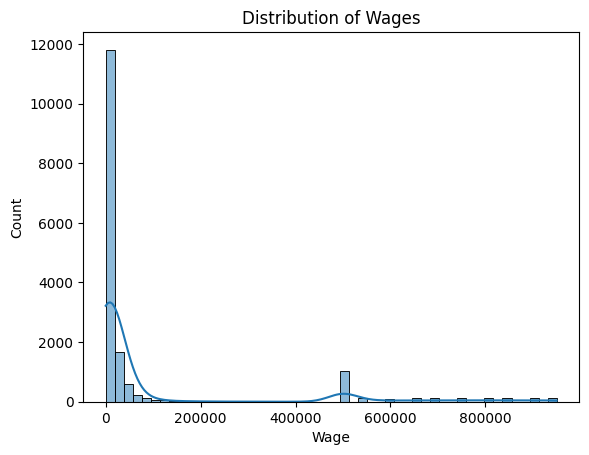

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Wage'], bins=50, kde=True)
plt.title("Distribution of Wages")
plt.xlabel("Wage")
plt.show()


Our wages are not normaly distributed

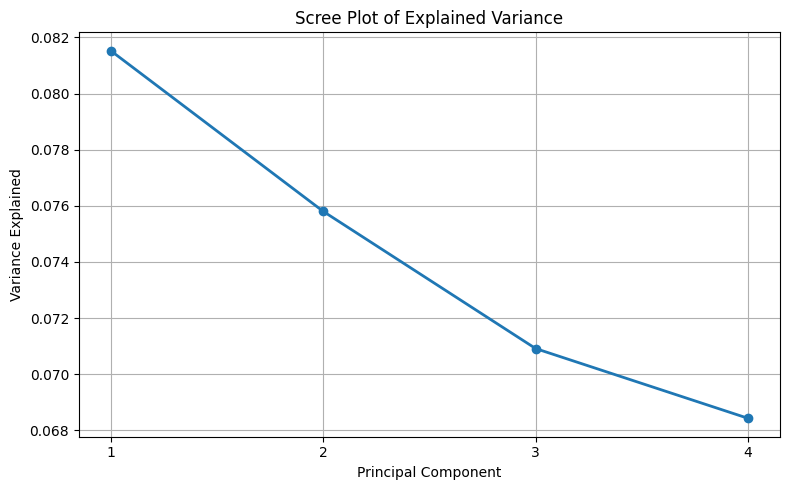

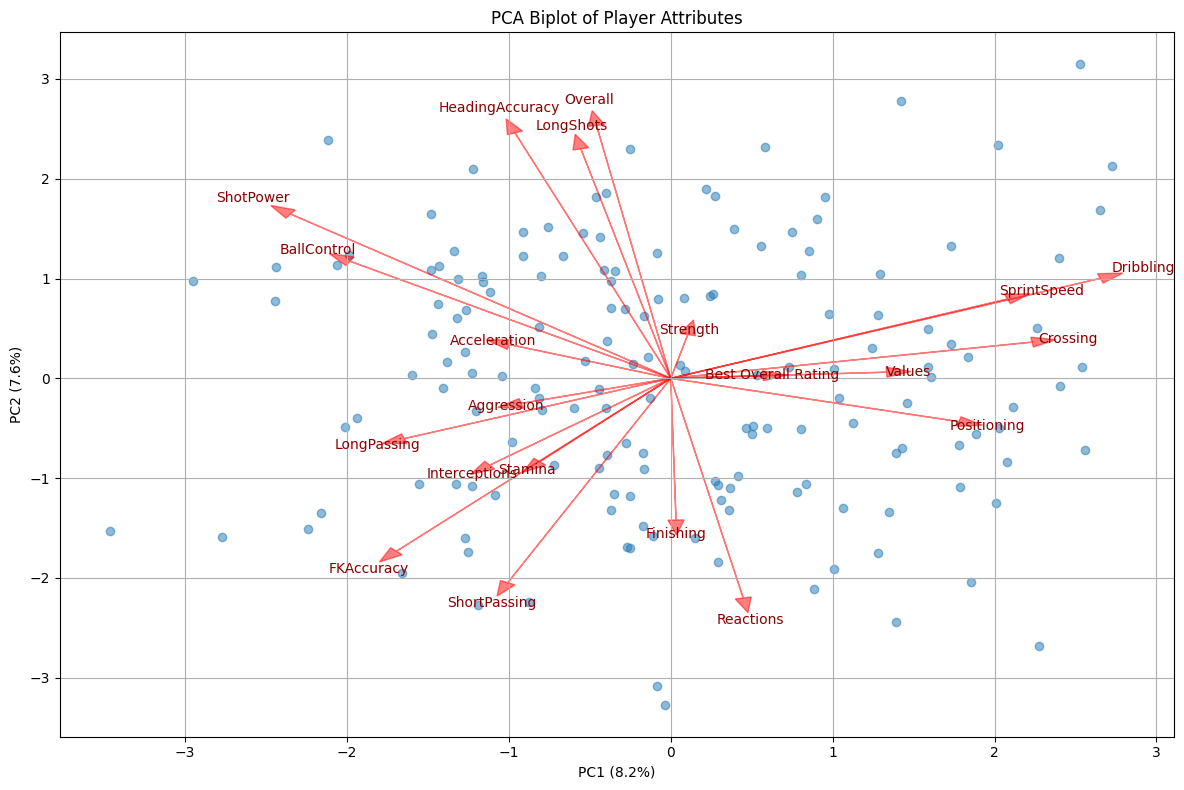

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Simulate df_clean structure for example (replace with real df_clean in practice)
# Assuming 'Wage' is the target
np.random.seed(42)
n_samples = 200
df_clean = pd.DataFrame({
    'Crossing': np.random.rand(n_samples) * 100,
    'Finishing': np.random.rand(n_samples) * 100,
    'HeadingAccuracy': np.random.rand(n_samples) * 100,
    'Values': np.random.rand(n_samples) * 100,
    'ShortPassing': np.random.rand(n_samples) * 100,
    'Dribbling': np.random.rand(n_samples) * 100,
    'FKAccuracy': np.random.rand(n_samples) * 100,
    'LongPassing': np.random.rand(n_samples) * 100,
    'BallControl': np.random.rand(n_samples) * 100,
    'Acceleration': np.random.rand(n_samples) * 100,
    'SprintSpeed': np.random.rand(n_samples) * 100,
    'Reactions': np.random.rand(n_samples) * 100,
    'ShotPower': np.random.rand(n_samples) * 100,
    'Stamina': np.random.rand(n_samples) * 100,
    'Strength': np.random.rand(n_samples) * 100,
    'Overall': np.random.rand(n_samples) * 100,
    'LongShots': np.random.rand(n_samples) * 100,
    'Aggression': np.random.rand(n_samples) * 100,
    'Interceptions': np.random.rand(n_samples) * 100,
    'Best Overall Rating': np.random.rand(n_samples) * 100,
    'Positioning': np.random.rand(n_samples) * 100,
    'Wage': np.random.rand(n_samples) * 20000 + 1000
})

# Define features and target
features = df_clean.drop(columns='Wage')
target = df_clean['Wage']

# Train-test split before PCA
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# PCA on training data only
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Scree plot
explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var)+1), explained_var, 'o-', linewidth=2)
plt.title('Scree Plot of Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_var)+1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Biplot
plt.figure(figsize=(12, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = features.columns

for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, loadings[i, 0]*5, loadings[i, 1]*5,
              color='r', alpha=0.5, head_width=0.1)
    plt.text(loadings[i, 0]*5.5, loadings[i, 1]*5.5,
             feature, color='darkred', ha='center', va='center')

plt.xlabel(f'PC1 ({explained_var[0]:.1%})')
plt.ylabel(f'PC2 ({explained_var[1]:.1%})')
plt.title('PCA Biplot of Player Attributes')
plt.grid()
plt.tight_layout()
plt.show()


Quantifying Feature Contributing the highest variance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Standardize your features
feature_variance = df_clean[[
    'Dribbling', 'Best Overall Rating', 'Values', 'Crossing', 'Positioning', 'SprintSpeed'
]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_variance)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # or more if needed
pca.fit(X_scaled)

# Step 3: Get PCA loadings (components) and compute contribution
loadings = pd.DataFrame(
    pca.components_.T,  # transpose to align features to PCs
    columns=['PC1', 'PC2'],
    index=feature_variance.columns
)

# Step 4: Compute variance contribution (squared loadings)
loadings['PC1_contrib'] = loadings['PC1']**2
loadings['PC2_contrib'] = loadings['PC2']**2
loadings['Total_contrib'] = loadings['PC1_contrib'] + loadings['PC2_contrib']

# Step 5: Sort by total contribution
important_features = loadings.sort_values(by='Total_contrib', ascending=False)

# Display top contributors
print(important_features[['PC1', 'PC2', 'Total_contrib']])


                          PC1       PC2  Total_contrib
Best Overall Rating  0.074080  0.697478       0.491964
Dribbling            0.613434 -0.078367       0.382443
Crossing             0.201290 -0.518911       0.309786
Values               0.545976  0.100749       0.308240
SprintSpeed          0.516042  0.187035       0.301282
Positioning          0.115341 -0.439297       0.206285


This analysis reveals that technical skills (Dribbling) and player ratings strongly distinguish players in different ways along the principal components, with physical attributes (SprintSpeed) and market Values also playing significant roles in player differentiation.

Model Training and Evaluation: We train the following models  because they do not assume normality and are not sensitive to scaling (Random Forest, XGBoost and Decision Tree)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Step 1: Drop rows with missing values
X_train_clean = X_train.dropna()
X_test_clean  = X_test.dropna()
y_train_clean = y_train.loc[X_train_clean.index]
y_test_clean  = y_test.loc[X_test_clean.index]

# Step 2: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled  = scaler.transform(X_test_clean)

# -----------------------------------
# 🔁 Model 1: Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train_clean)
y_pred_rf = rf_model.predict(X_test_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test_clean, y_pred_rf))
r2_rf   = r2_score(y_test_clean, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")

# -----------------------------------
# 🔁 Model 2: XGBoost
xgb_model = XGBRegressor(random_state=42, verbosity=0)
xgb_model.fit(X_train_scaled, y_train_clean)
y_pred_xgb = xgb_model.predict(X_test_scaled)

rmse_xgb = np.sqrt(mean_squared_error(y_test_clean, y_pred_xgb))
r2_xgb   = r2_score(y_test_clean, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")

# -----------------------------------
# 🔁 Model 3: Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train_clean)
y_pred_dt = dt_model.predict(X_test_scaled)

rmse_dt = np.sqrt(mean_squared_error(y_test_clean, y_pred_dt))
r2_dt   = r2_score(y_test_clean, y_pred_dt)
print(f"Decision Tree - RMSE: {rmse_dt:.2f}, R²: {r2_dt:.2f}")


Random Forest - RMSE: 6815.86, R²: -0.21
XGBoost - RMSE: 7655.01, R²: -0.53
Decision Tree - RMSE: 10745.75, R²: -2.01


Point to note:
Lower RMSE indicates better accuracy

Higher R² indicates better explanatory power

The ranking from best to worst is:

Random Forest: RMSE = 6815.86, R² = -0.21

XGBoost: RMSE = 7655.01, R² = -0.53

Decision Tree: RMSE = 10745.75, R² = -2.01

However, it's worth noting that all models have negative R² values, suggesting they perform worse than simply using the mean value as a prediction. The Random Forest model still needs improvement, but it's the best option among these three.

Grid Search and Model Diagnosis

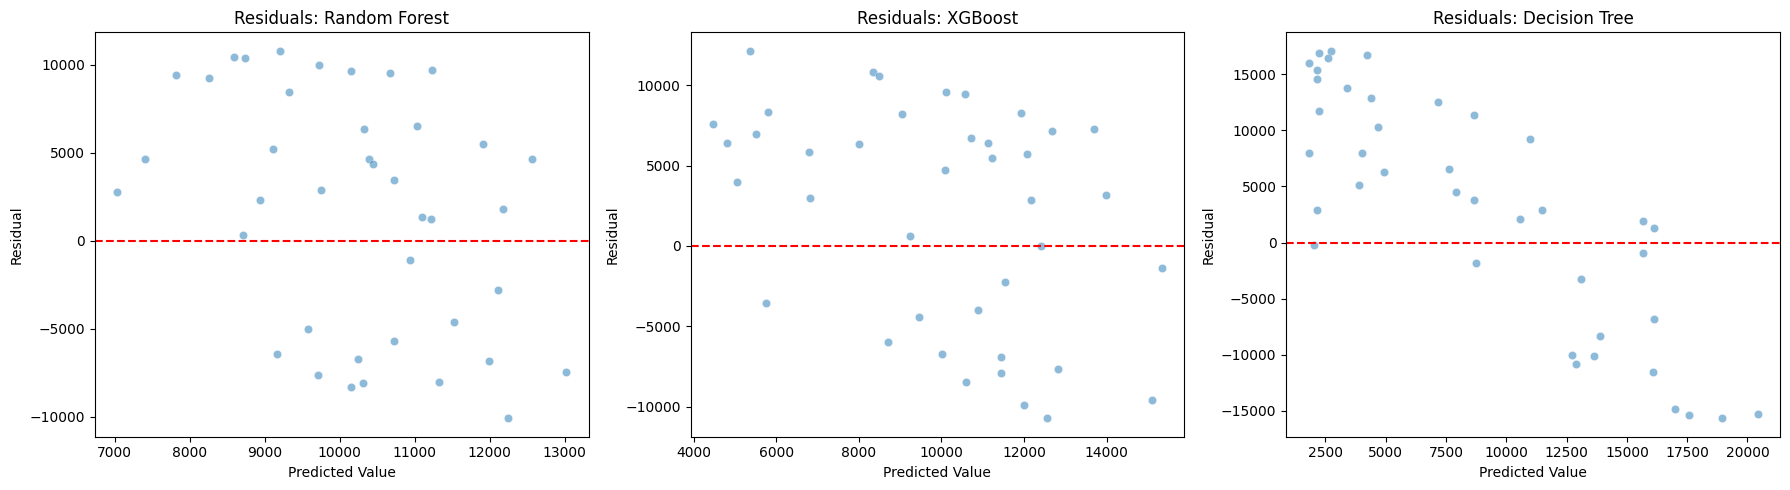

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 1. Define parameter grids
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
dt_params = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
xgb_params = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]}

# 2. Initialize models
rf = RandomForestRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# 3. Perform Grid Search
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
dt_grid = GridSearchCV(dt, dt_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)

rf_grid.fit(X_train, y_train)
dt_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

# 4. Make predictions with best models
y_pred_rf = rf_grid.best_estimator_.predict(X_test)
y_pred_dt = dt_grid.best_estimator_.predict(X_test)
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test)

# 5. Create DataFrame with residuals
residuals_df = pd.DataFrame({
    'Random Forest': y_test - y_pred_rf,
    'XGBoost': y_test - y_pred_xgb,
    'Decision Tree': y_test - y_pred_dt,
    'Pred_RF': y_pred_rf,
    'Pred_XGB': y_pred_xgb,
    'Pred_DT': y_pred_dt
})

# 6. Plot residuals
plt.figure(figsize=(18, 5))

# Random Forest
plt.subplot(1, 3, 1)
sns.scatterplot(x=residuals_df['Pred_RF'], y=residuals_df['Random Forest'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals: Random Forest')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

# XGBoost
plt.subplot(1, 3, 2)
sns.scatterplot(x=residuals_df['Pred_XGB'], y=residuals_df['XGBoost'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals: XGBoost')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

# Decision Tree
plt.subplot(1, 3, 3)
sns.scatterplot(x=residuals_df['Pred_DT'], y=residuals_df['Decision Tree'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals: Decision Tree')
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()


Evaluating on Test

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Helper function to evaluate and print performance
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return rmse, r2

# Evaluate all tuned models on test data
print("Final Evaluation on Test Set:")
evaluate_model(best_rf,  X_test_scaled, y_test_clean, "Random Forest (Tuned)")
evaluate_model(best_xgb, X_test_scaled, y_test_clean, "XGBoost (Tuned)")
evaluate_model(best_dt,  X_test_scaled, y_test_clean, "Decision Tree (Tuned)")


Final Evaluation on Test Set:
Random Forest (Tuned) - RMSE: 6808.55, R²: -0.21
XGBoost (Tuned) - RMSE: 6690.72, R²: -0.17
Decision Tree (Tuned) - RMSE: 7715.66, R²: -0.55


(np.float64(7715.663825174948), -0.5493445625942861)

Improvements from hyperparameter tuning were marginal (e.g., XGBoost R² improved from -0.53 to -0.17).

Model Evaluation

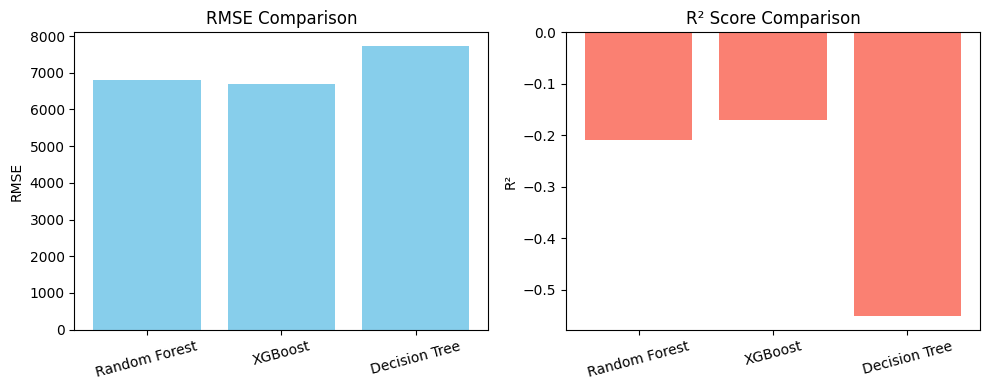

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ["Random Forest", "XGBoost", "Decision Tree"]

# RMSE and R² values
rmse_values = [6808.55, 6690.72, 7715.66]
r2_values   = [-0.21, -0.17, -0.55]

# Plot RMSE
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color='skyblue')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=15)

# Plot R²
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='salmon')
plt.title('R² Score Comparison')
plt.ylabel('R²')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


XGBoost and Random Forest perform similarly and better than Decision Tree, but all models fail to capture the underlying patterns in the data, as shown by their negative R² values and relatively high RMSE. This suggests that the current features do not adequately explain wage variation, and further feature engineering or data enrichment is needed


Feature Importance

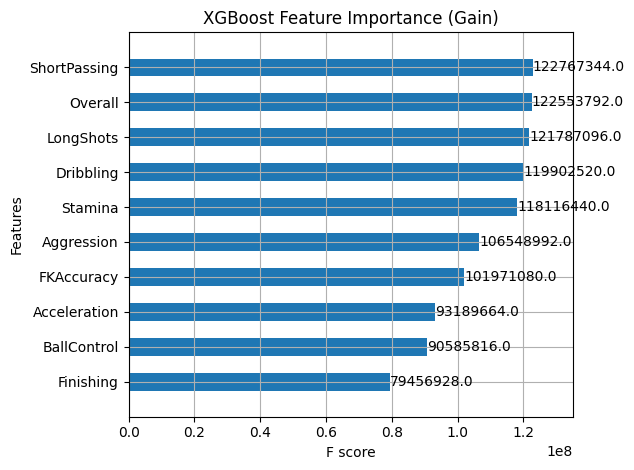

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Refit XGBoost model with feature names if not already included
best_xgb.fit(X_train_scaled, y_train_clean)

# Assign feature names (must match columns in original X_train)
best_xgb.get_booster().feature_names = list(X_train_clean.columns)

# Plot top 10 features by gain
xgb.plot_importance(best_xgb, importance_type='gain',
                    max_num_features=10,
                    height=0.5,
                    title='XGBoost Feature Importance (Gain)')
plt.tight_layout()
plt.show()


The XGBoost model considers technical skills (like ShortPassing, LongShots, Dribbling) and overall player quality (Overall) as the most important factors in predicting wages,

 SHAP (SHapley Additive exPlanations) to interpret how each feature contributes to a model's prediction

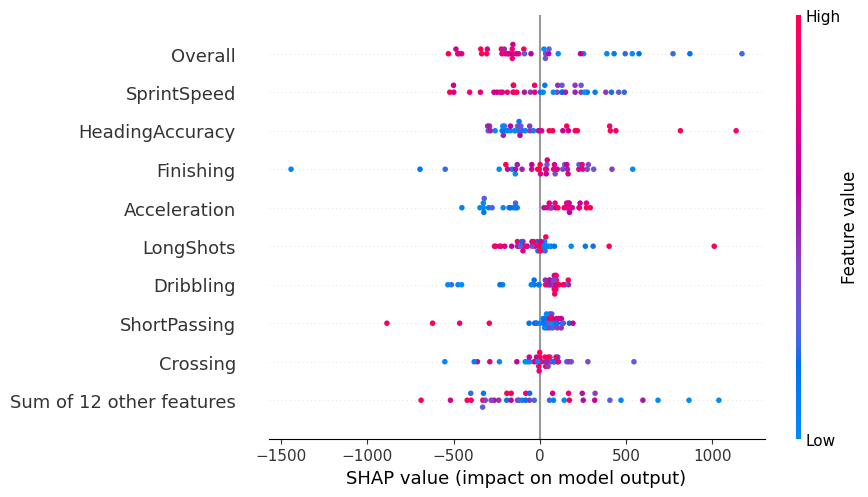

In [ ]:

# Reconstruct scaled test set as DataFrame with correct feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_clean.columns)

# Create SHAP explainer for the tuned XGBoost model
explainer = shap.Explainer(best_xgb, X_test_scaled_df)
shap_values = explainer(X_test_scaled_df)

# Beeswarm plot showing top 10 features
shap.plots.beeswarm(shap_values, max_display=10)


The model heavily relies on technical ability (Overall, Finishing, HeadingAccuracy) and physical traits (SprintSpeed, Acceleration).